# Caracterização de motor CC

In [6]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt

Primeiro passo, abrir o arquivo com os dados

In [7]:
dt = 0.0001
dados1 = pd.read_csv("labMotorCC/motorSemCarga.csv",sep='\t')
dados2 = pd.read_csv("labMotorCC/motorComCarga.csv",sep='\t')
tamanho = dados1.vr.size
T = tamanho/dt
dados1["tempo"] = np.arange(tamanho)*dt
tamanho = dados2.vr.size
T = tamanho/dt
dados2["tempo"] = np.arange(tamanho)*dt
dados1.head()

,vr,encoder,tempo
0,0.005,0.025,0.0000
1,0.002,0.023,0.0001
2,0.001,0.020,0.0002
3,-0.004,0.019,0.0003
4,-0.004,0.023,0.0004


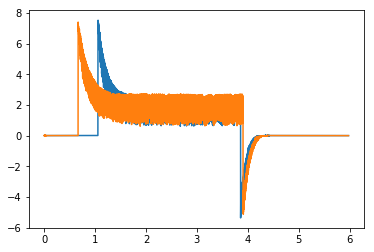

In [8]:
plt.plot(dados1.tempo,dados1.vr)
plt.plot(dados2.tempo,dados2.vr)
#plt.plot(dadosI.tempo,dadosI.liga)

C:\Users\joaopaulo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\joaopaulo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


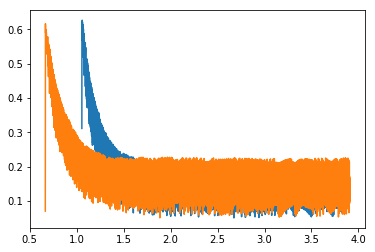

In [10]:
inicio1 = dados1[dados1.vr>0.5]
inicio1['corrente'] = inicio1.vr/12
inicio2 = dados2[dados2.vr>0.5]
inicio2['corrente'] = inicio2.vr/12
plt.plot(inicio1.tempo,inicio1.corrente)
plt.plot(inicio2.tempo,inicio2.corrente)
#b, a = signal.butter(5, 0.05)
#cor1Filt = signal.lfilter(b, a, inicio1.corrente)
#cor2Filt = signal.lfilter(b, a, inicio2.corrente)
#plt.plot(inicio1.tempo,cor1Filt)
#plt.plot(inicio1.tempo,cor2Filt)

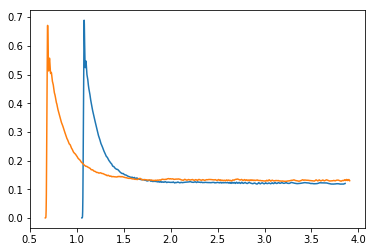

In [15]:
b, a = signal.butter(7, 0.01)
cor1Filt = signal.lfilter(b, a, inicio1.corrente)
cor2Filt = signal.lfilter(b, a, inicio2.corrente)
plt.plot(inicio1.tempo,cor1Filt)
plt.plot(inicio2.tempo,cor2Filt)

C:\Users\joaopaulo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


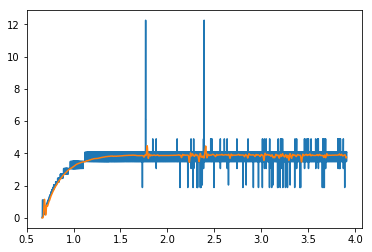

In [17]:
positivo = inicio2.encoder.iloc[0]>0
contador = 0
ultimoContador = 1000
periodos = []
for sinal in inicio2.encoder:
    if sinal<0 and positivo:
        positivo = False
    elif sinal>0 and not positivo:
        positivo = True
        ultimoContador = contador
        contador = 0
    periodos.append(ultimoContador)
    contador = contador + 1
inicio2['frequencia'] = [1.0/(dt*periodo*12*34) for periodo in periodos]
plt.plot(inicio2.tempo,inicio2.frequencia)
freqFilt2 = signal.lfilter(b, a, inicio2.frequencia)
plt.plot(inicio2.tempo,freqFilt2)

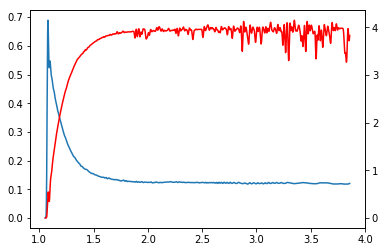

In [18]:
ax = plt.gca()
ax2 = ax.twinx()
ax.plot(inicio1.tempo,cor1Filt)
ax2.plot(inicio1.tempo,freqFilt,'r')

[1.24210943 0.27657362 0.12212864 0.15758397] [0.98855109 0.22190208 0.13184544 0.18531814]


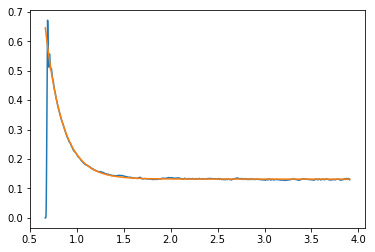

In [21]:
from scipy.optimize import curve_fit
def corrente(tempo, t0,Ipico,Imed,tau):
    return Imed+(Ipico-Imed)*np.exp(-(tempo-t0)/tau)
popt2,pcov2 = curve_fit(corrente,inicio2.tempo[inicio2.tempo>0.7],cor2Filt[inicio2.tempo>0.7])
plt.plot(inicio2.tempo,cor2Filt)
plt.plot(
    inicio2.tempo,corrente(inicio2.tempo,popt2[0],popt2[1],popt2[2],popt2[3]))
print(popt,popt2)


[2.69378171 3.71132086 0.14927314]
[2.67877325 3.71148515 0.14997188]


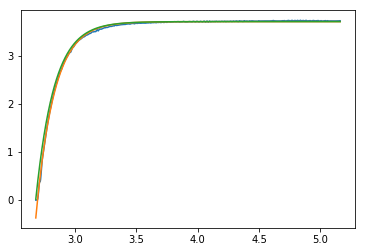

In [103]:
def freq(tempo, t0,vfim,tau):
    return vfim*(1-np.exp(-(tempo-t0)/tau))
poptV,pcov = curve_fit(freq,inicio.tempo[inicio.tempo>2.7],freqFilt[inicio.tempo>2.7],p0=[2.635,3.8,0.13941226])
#popt,pcov = curve_fit(corrente,inicio.tempo,corFilt)
poptV2,pcov2 = curve_fit(freq,inicio.tempo[inicio.tempo>2.7],inicio.frequencia[inicio.tempo>2.7],p0=[2.635,3.8,0.13941226])
plt.plot(inicio.tempo,freqFilt)
plt.plot(inicio.tempo,freq(inicio.tempo,poptV[0],poptV[1],poptV[2]))
plt.plot(inicio.tempo,freq(inicio.tempo,poptV2[0],poptV2[1],poptV2[2]))
print(poptV)
print(poptV2)

In [22]:
dados3 = pd.read_csv("labMotorCC/motorTravado.csv",sep='\t')
tamanho = dados3.vr.size
T = tamanho/dt
dados3["tempo"] = np.arange(tamanho)*dt
tamanho = dados3.vr.size
dados3.head()

,vr,encoder,tempo
0,-0.003,0.019,0.0000
1,-0.003,0.021,0.0001
2,-0.002,0.024,0.0002
3,0.002,0.025,0.0003
4,0.002,0.023,0.0004


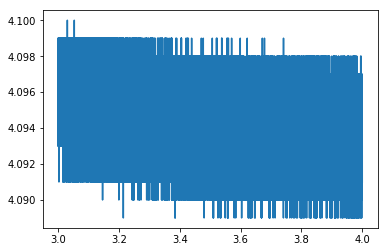

In [25]:
pedaco3 = dados3[dados3.tempo>=3.0]
pedaco3 = pedaco3[pedaco3.tempo<=4.0]
plt.plot(pedaco3.tempo,pedaco3.vr)

In [28]:
Vrtravado = pedaco3.vr.mean()
Itravado = Vrtravado/12
Ra = (7-Vrtravado)/Itravado

In [29]:
Ra

8.515760059647521